## Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading file

In [2]:
filename = 'USvideos.csv'
df = pd.read_csv(filename)

In [6]:
df = df.drop(['video_id','trending_date','category_id','publish_time','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description'], axis=1)

In [9]:
df['percentage_of_likes'] = df['likes'] / (df['likes'] + df['dislikes']) * 100

In [10]:
df.head()

,title,channel_title,tags,views,likes,dislikes,comment_count,percentage_of_likes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954,95.096953
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,94.052124
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,96.472928
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,93.854955
4,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,98.518149


## Looking for missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                40949 non-null  object 
 1   channel_title        40949 non-null  object 
 2   tags                 40949 non-null  object 
 3   views                40949 non-null  int64  
 4   likes                40949 non-null  int64  
 5   dislikes             40949 non-null  int64  
 6   comment_count        40949 non-null  int64  
 7   percentage_of_likes  40779 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 2.5+ MB


In [12]:
percentage_missing = df['percentage_of_likes'].isna()

In [13]:
df.loc[percentage_missing, : ]

,title,channel_title,tags,views,likes,dislikes,comment_count,percentage_of_likes
192,Apple Clips sample,Steve Kovach,[none],2259,0,0,0,NaN
1435,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,NaN
1667,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,NaN
1868,Highlights of the EA predatory behavior announ...,chris lee,[none],160012,0,0,1722,NaN
1914,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,0,0,NaN
...,...,...,...,...,...,...,...,...
28135,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664,0,0,0,NaN
28346,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731,0,0,0,NaN
28550,Coachella 2018 LIVE Channel 1,Coachella,[none],3598220,0,0,0,NaN
28751,Coachella 2018 LIVE Channel 1,Coachella,[none],11137071,0,0,2,NaN


In [14]:
df.loc[percentage_missing, 'percentage_of_likes'] = 0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                40949 non-null  object 
 1   channel_title        40949 non-null  object 
 2   tags                 40949 non-null  object 
 3   views                40949 non-null  int64  
 4   likes                40949 non-null  int64  
 5   dislikes             40949 non-null  int64  
 6   comment_count        40949 non-null  int64  
 7   percentage_of_likes  40949 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 2.5+ MB


In [19]:
df['views_million'] = df['views'] / 1000000

In [20]:
df.head()

,title,channel_title,tags,views,likes,dislikes,comment_count,percentage_of_likes,views_million
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954,95.096953,0.748374
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,94.052124,2.418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,96.472928,3.191434
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,93.854955,0.343168
4,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,98.518149,2.095731


## Scatterplot

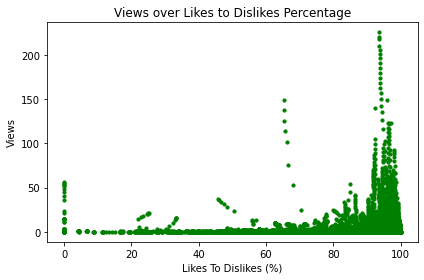

In [21]:
x = df.percentage_of_likes 
y = df.views_million
plt.scatter(x,y, s=10, c='green')
plt.xlabel('Likes To Dislikes (%)')
plt.ylabel('Views')
plt.title('Views over Likes to Dislikes Percentage')
plt.tight_layout()

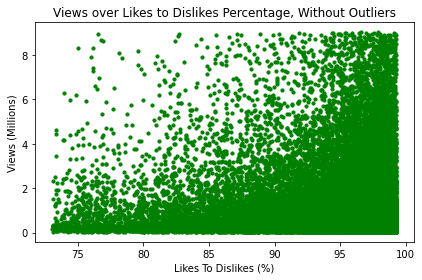

In [22]:
#removing outliers
x = df['percentage_of_likes']
removed_outliers1 = x.between(x.quantile(.05), x.quantile(.95))
y = df['views_million']
removed_outliers2 = y.between(y.quantile(.05), y.quantile(.95))
#doing a scatterplot
plt.scatter(x[removed_outliers1],y[removed_outliers2], s=10, c='green')
plt.xlabel('Likes To Dislikes (%)')
plt.ylabel('Views (Millions)')
plt.title('Views over Likes to Dislikes Percentage, Without Outliers')
plt.tight_layout()

## Boxplot

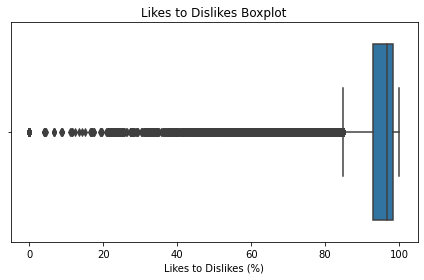

In [24]:
sns.boxplot(x='percentage_of_likes', data=df)
plt.suptitle("")
plt.xlabel('Likes to Dislikes (%)')
plt.title('Likes to Dislikes Boxplot')

plt.tight_layout()